In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ecomerce_df = pd.read_csv("Ecommerce Customers")
ecomerce_df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
ecomerce_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


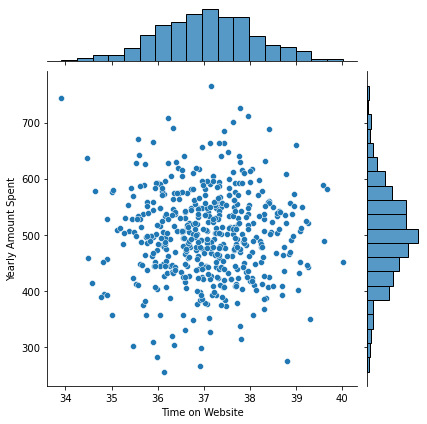

In [5]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=ecomerce_df)

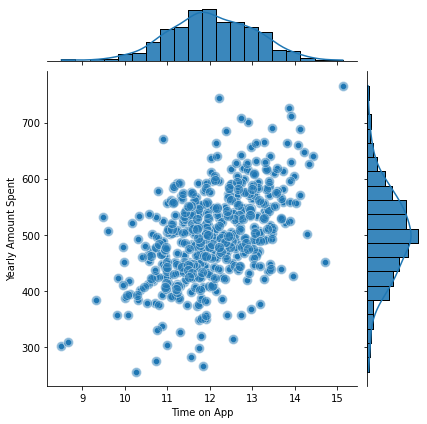

In [13]:
g = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=ecomerce_df)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

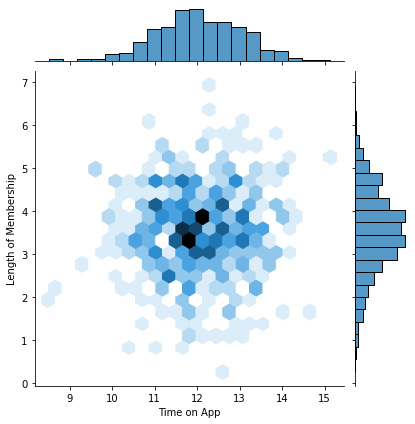

In [14]:
sns.jointplot(x='Time on App', y='Length of Membership', data=ecomerce_df, kind='hex')

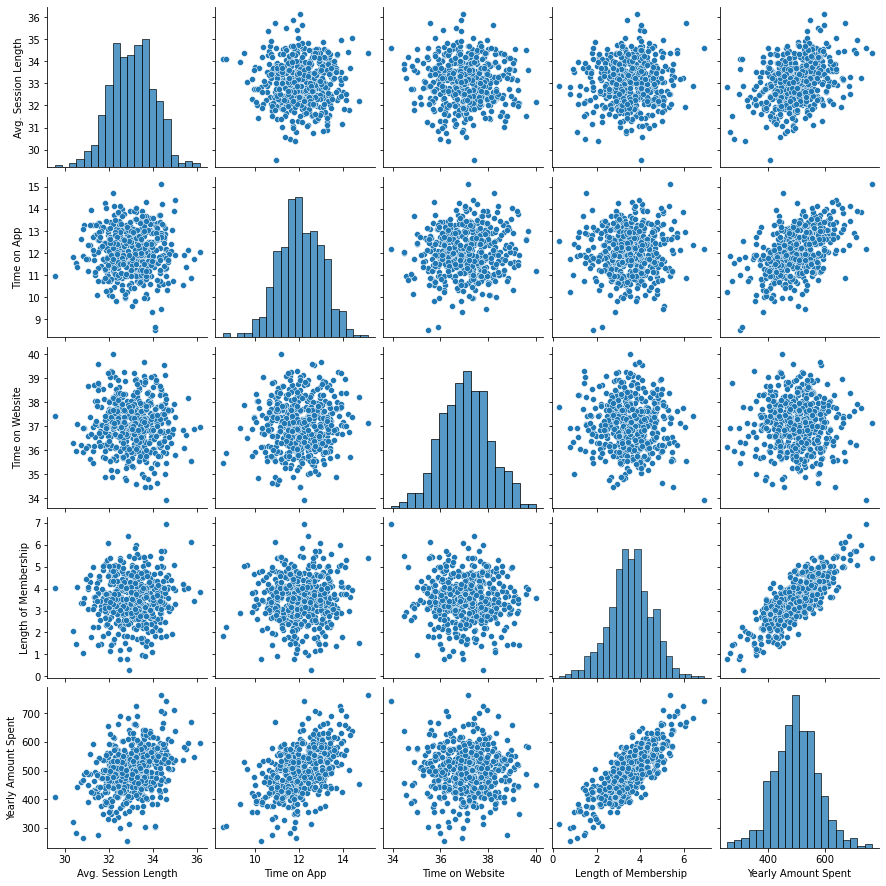

In [15]:
sns.pairplot(ecomerce_df)

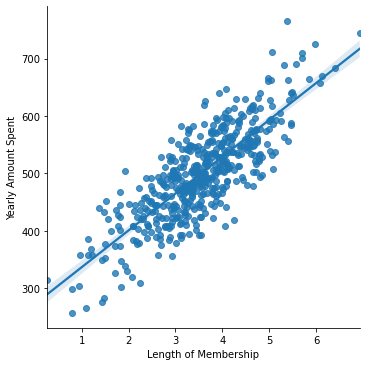

In [17]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=ecomerce_df)

TREINANDO E TESTANDO DADOS

In [30]:
y=ecomerce_df['Yearly Amount Spent']

In [34]:
x=ecomerce_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

Criar conjunto de treinamento

In [35]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

Treinamento do modelo

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Previsão de dados do teste

In [69]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Prediction')

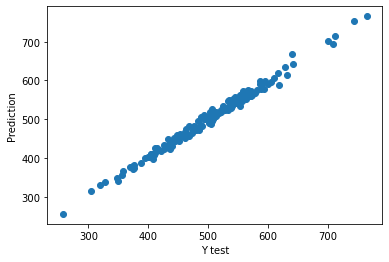

In [70]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Prediction')

Avaliação do modelo

In [71]:
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430806
MSE: 79.8130516509741
RMSE: 8.933815066978614


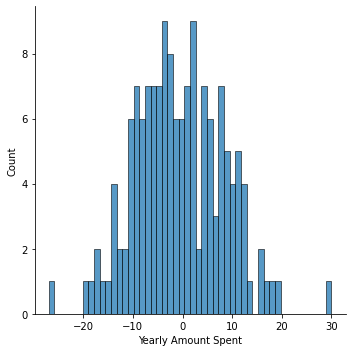

In [75]:
sns.displot((y_test-prediction), bins=50)

In [76]:
coef = pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Programas atrativos para fidelização do cliente e melhoria da UX do App
Website não possui ganhos aparentes a empresa